# Getting started with Ames housing dataset on Google Colab

## Some useful short-cuts
Comment out code (win): CTRL + /

Comment out code (OSX): CMD + /

Execute cell (win/OSX): SHFT + Enter

## Import libraries

In [101]:
# Main libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from i_general import *
# Library to connect Colab with Google Drive.
#from google.colab import drive

## Mount Google Drive to Colab

In [43]:
#drive.mount('/content/drive')

## Load 'Ames Housing' Data - demonstrating three different ways

1 - Click on the 'AmesHousing.csv' file in the ['ames-housing'](https://github.com/jads-nl/discover-projects/tree/main/ames-housing) repo on GitHub. Click on the **Raw** button. Copy the link in the URL bar. Paste the link in the Pandas function 'read_csv()': 


In [44]:
#df_original = pd.read_csv('https://raw.githubusercontent.com/jads-nl/discover-projects/main/ames-housing/AmesHousing.csv')

2 - Right click on the 'AmesHousing.csv' file in the ['ames-housing'](https://github.com/jads-nl/discover-projects/tree/main/ames-housing) repo on GitHub, and copy link to the file. Paste the link in the Pandas function 'read_csv' and add '?raw=True': 


In [45]:
#df_original = pd.read_csv('https://github.com/jads-nl/discover-projects/blob/main/ames-housing/AmesHousing.csv'+'?raw=True')

3 - In case the csv file is located on your Google Drive and you have mounted your GoogleDrive to Colab, add a link to the concerned file in the Pandas function 'read_csv'. Of course, in your case the csv file will most likely have a different path:

In [46]:
#Function that creates a datafram
def import_DF (path):
    #Split the path
    splitted = path.split(".")
    if splitted[-1] == 'csv':
        return pd.read_csv(path)
#Excersize 1 a
df = import_DF('AmesHousing.csv')

#Function checking types of data
def Check_Data(df):
    result = {}
    #Loop through all the columns
    for i in df:
        try:
            result[df[i].dtype] +=1
        except:
            result[df[i].dtype] = 1
    return result


#Extra split the set in 2 for later use
def split_df(df,ratio):
    part_xx = df.sample(frac = ratio /100)
    rest_part = df.drop(part_xx.index)
    return part_xx, rest_part

# split the data frame
df_train, df_test = split_df(df = df, ratio = 70)
print(df_train.size, df_test.size)


168182 72078


Excercise 3

In [89]:
#Excersize 3
#3a
print(df_train['SalePrice'].isnull().values.any())


def fillNa(df):

    j = 0
    for i in df_train:
        j = j +1 
        if df[i].dtype == 'int64' or df[i].dtype == float:
            df[i] = df[i].fillna(df[i].median())
        else:
            #3b/3c
            df[i] = df[i].fillna(df[i].mode())
    return df

df_train = fillNa(df_train)
df_test = fillNa(df_test)




False


Excersize 4 

count      2051.000000
mean     181516.972209
std       79505.075361
min       12789.000000
25%      130000.000000
50%      161500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: ylabel='Frequency'>

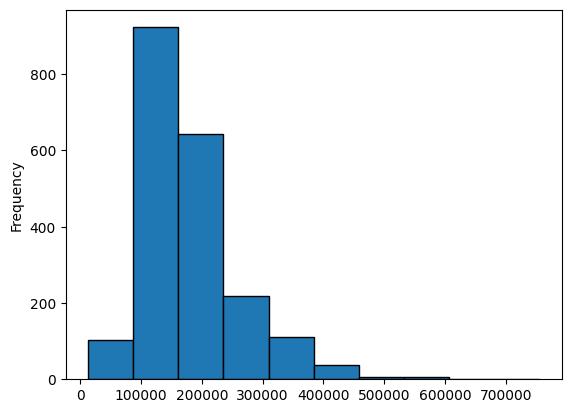

In [48]:
#Excersize 4 a 
print(df_train['SalePrice'].describe())
#Excersize 4 b
df_train['SalePrice'].plot(kind='hist', edgecolor='black')

<Axes: xlabel='SalePrice', ylabel='Neighborhood'>

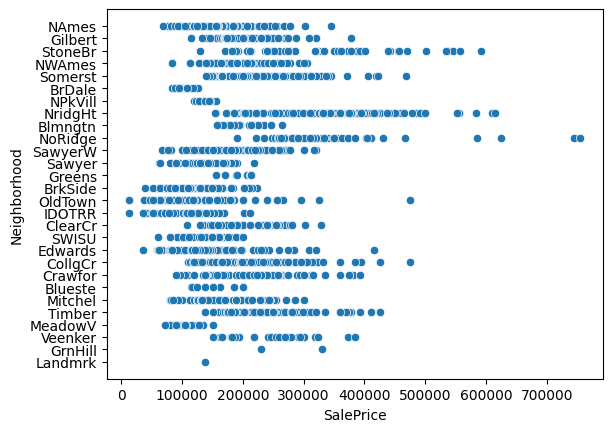

In [49]:
#Excersize 4c
import matplotlib
import seaborn
seaborn.scatterplot(df_train,y = df['Neighborhood'], x= df['SalePrice'])


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

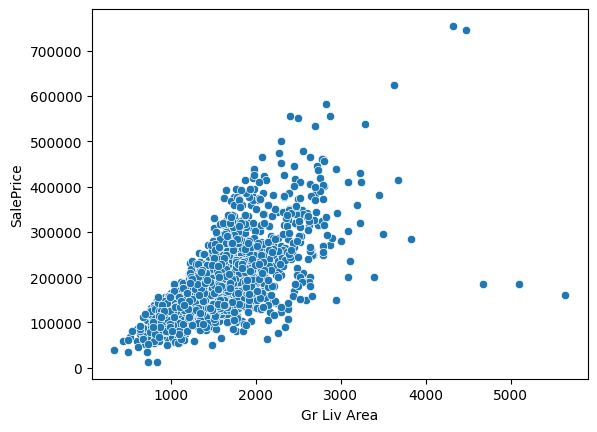

In [50]:
#Excersize 4d
seaborn.scatterplot(df_train,x = df_train['Gr Liv Area'], y= df_train['SalePrice'])

Working on column: Gr Liv Area
Working on column: SalePrice
Working on column: Gr Liv Area
Working on column: SalePrice


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

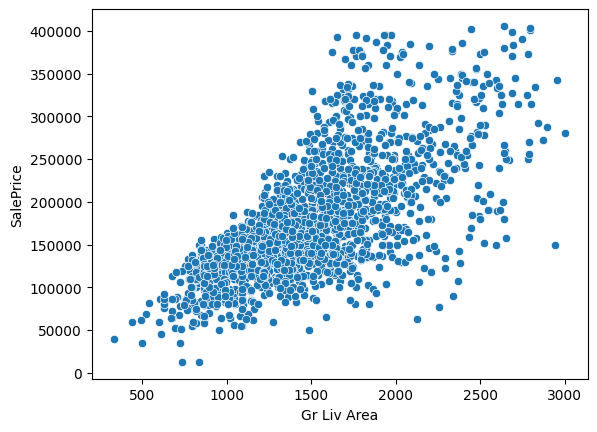

In [92]:
#Excersize 4d 
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]        
    return df

#remove 3 standard deviation (0,3%)
columns = ['Gr Liv Area','SalePrice']
df_cleaned = remove_outliers(df = df_train,columns=columns,n_std =3)
df_cleaned_test = remove_outliers(df = df_test,n_std= 3,columns=columns)
#Plot the new data set with outliers removed
seaborn.scatterplot(df_cleaned,x = df_cleaned['Gr Liv Area'], y= df_cleaned['SalePrice'])





      Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual   
1625   1626  527162140           60          60.0      7500             6  \
2469   2470  528488130           20          60.0      7200             7   
648     649  535353040           20          60.0      7626             5   
1924   1925  535177110           20          80.0      9736             6   
2399   2400  528164040           20          72.0     11846             9   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...   
1625             5        1999            2003           0.0  ...  \
2469             5        2006            2006           0.0  ...   
648              8        1952            2005           0.0  ...   
1924             6        1957            1969         289.0  ...   
2399             5        2003            2004         562.0  ...   

      Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch   
1625           188             30          

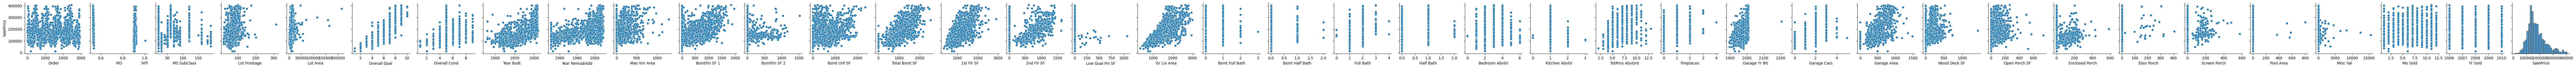

In [93]:
#Excersize 4 e
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_cleaned_Numeric = df_cleaned.select_dtypes(include=numerics)
df_test_cleaned_numeric = df_cleaned_test.select_dtypes(include=numerics)
print(df_cleaned_Numeric.head())
seaborn.pairplot(df_cleaned_Numeric, y_vars='SalePrice')





<Axes: >

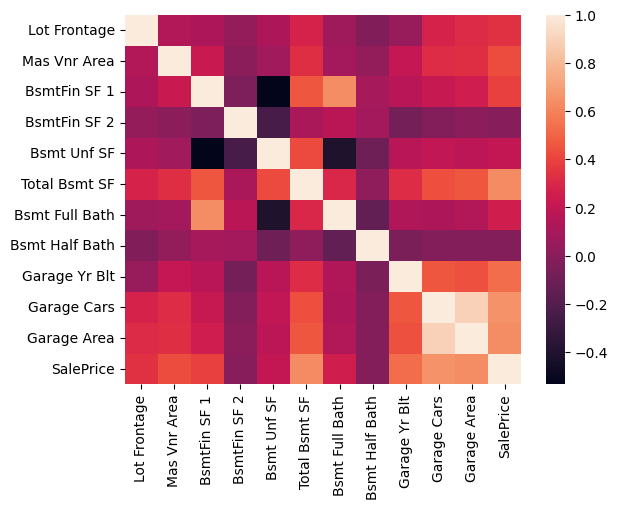

In [53]:
#Excersize 4 f
#Get a dataframe with only continous variables
cont = ['float16', 'float32', 'float64']
df_cleaned_Cont = df_cleaned_Numeric.select_dtypes(include=cont)

df_cleaned_Cont['SalePrice'] = df_cleaned_Numeric['SalePrice']

tempdf = df_cleaned_Cont['Garage Area'] + df_cleaned_Cont['SalePrice']

cormat = df_cleaned_Cont.corr()
round(cormat,2)

seaborn.heatmap(cormat)


Performance Metrics:
MAE:  16,888.824
MSE:  542,325,978.459
RMSE: 23,287.893


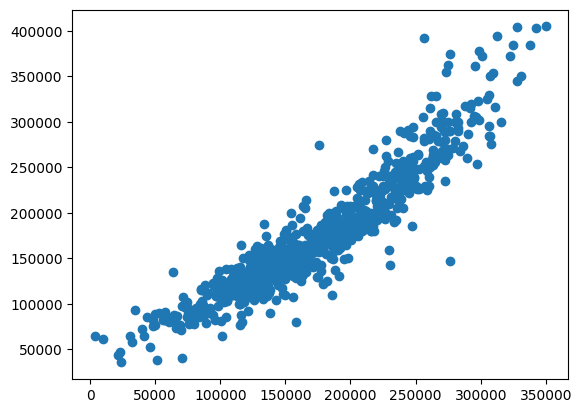

In [106]:
# Excersize 5 a
#import the librarys
from sklearn import linear_model

reg = linear_model.LinearRegression()
#Drop the sale price from the data frame
#print(df_cleaned_Numeric.head())
df_cleaned_Numeric_x_Only = df_cleaned_Numeric.drop(['SalePrice'],axis= 1)
df_test_cleaned_Numeric_x_Only = df_test_cleaned_numeric.drop(['SalePrice'],axis= 1)

reg.fit(df_cleaned_Numeric_x_Only,df_cleaned_Numeric['SalePrice'])
#print(reg.score(df_test_cleaned_Numeric_x_Only,df_test_cleaned_numeric['SalePrice']))

prediction = reg.predict(df_test_cleaned_Numeric_x_Only)

plt.scatter(prediction, df_test_cleaned_numeric['SalePrice'])

f_evaluation_results(prediction, df_test_cleaned_numeric['SalePrice'])


#f_evaluation_results()

## Show columns with missing data

In [33]:
# Number of missing values for each column:
v_total_missing   = df.isnull().sum()

# Percentage out of total elements in each column (= df.shape[0]):
v_percent_missing = round(
    
    v_total_missing / df.shape[0] * 100,
                          
    ndigits = 1)

# Type of data for each column:
v_missing_type    = df.dtypes

# Create data frame showing statistics per column:
df_missing_data   = pd.DataFrame(
    
    {'type': v_missing_type,
     'total': v_total_missing,
     'percent': v_percent_missing})

# Sort data frame by 'total' (descending order):
df_missing_data   = df_missing_data.sort_values(by='total', ascending = False)

# Show first n columns with highest number of missing data:
df_missing_data.head(n=20)

,type,total,percent
Pool QC,object,2917,99.6
Misc Feature,object,2824,96.4
Alley,object,2732,93.2
Fence,object,2358,80.5
Mas Vnr Type,object,1775,60.6
Fireplace Qu,object,1422,48.5
Lot Frontage,float64,490,16.7
Garage Cond,object,159,5.4
Garage Finish,object,159,5.4
Garage Yr Blt,float64,159,5.4


### Replace empty cells (NA) by other value.
Suppose we want to apply a different strategy to number and object data.

In [34]:
# Let's first split the data frame in two data frames:

# Numbers:
df_number = df.select_dtypes(include = "number")

# Objects:
df_object = df.select_dtypes(exclude = "number")

# Show that the two data frames together contains as many columns as df:
print(
    df_number.shape[1],
    df_object.shape[1],
    df_number.shape[1] + df_object.shape[1],
    df.shape[1])

39 43 82 82


### Replace NA's in number data by median
We demonstrate two different approaches. The 'replace()' function replaces a value of choice by another value of choice. Where, the function 'fillna()' assumes we want to replace NA by another value of choice.

In [35]:
#df_number_imputed = df_number.replace(np.nan, df_number.median())
df_number_imputed = df_number.fillna(df_number.median())

# Show that imputed data no longer contains NA:
print(
    df_number.isna().sum().sum(),
    df_number_imputed.isna().sum().sum())        

682 0


### Replace NA's in object data by "100"

In [36]:
#df_object_imputed = df_object.replace(np.nan, "100")
df_object_imputed = df_object.fillna("100")

# Show that imputed data no longer contains NA:
print(
    df_object.isna().sum().sum(),
    df_object_imputed.isna().sum().sum())   

15067 0


In [37]:
# Put the two imputed data frames together again:
df_imputed = pd.concat([df_number_imputed, df_object_imputed], axis = 1)

print(
    df_imputed.shape,
    df.shape)

(2930, 82) (2930, 82)
